# 2. recomendation of engine suggesting products

# Recomendar Engine

## 1. recomendation system for students carrier

CareerVillage.org is a nonprofit that crowdsources career advice for underserved youth. Founded in 2011 in four classrooms in New York City, the platform has now served career advice from 25,000 volunteer professionals to over 3.5M online learners. The platform uses a Q&A style similar to StackOverflow or Quora to provide students with answers to any question about any career.

#### Your objective: develop a method to recommend relevant questions to the professionals who are most likely to answer them.

#### Criteria for Measuring Solutions
##### Performance: How well does the solution match professionals to the questions they would be motivated to answer? CareerVillage.org will not be able to live-test every submission, so a strong entry will clearly articulate why it will be effective at motivating answers.

###### Easy to implement: The CareerVillage.org team wants to put the winning submissions to work, quickly. A good entry will be well documented and easy to test in production.

###### Extensibility: In the future, CareerVillage.org aims to add more data features and to accommodate new objectives. Winning submissions should allow for this and other augmentations to be added in the future.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For Bar Plots
import matplotlib as mpl

In [2]:
professionals = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//professionals.csv', 
                            parse_dates = ['professionals_date_joined'])


In [3]:
students = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//students.csv',
                       parse_dates = ['students_date_joined'])


In [4]:
groups = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//groups.csv')


In [5]:
group_memberships = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//group_memberships.csv')


In [6]:
emails = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//emails.csv',
                     parse_dates = ['emails_date_sent'])


In [7]:
matches = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//matches.csv')


In [8]:
questions = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//questions.csv',
                        parse_dates = ['questions_date_added'])


In [9]:
answers = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//answers.csv', 
                      parse_dates = ['answers_date_added'])


In [10]:
tag_questions = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//tag_questions.csv')


In [11]:
tags = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//tags.csv')



In [12]:
tag_users = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//tag_users.csv')


In [13]:
comments = pd.read_csv('C://Users//DELL//Downloads//DATASET END TO END WORKOUT//comments.csv')

In [14]:
print(professionals.columns)
print('-'*70)
print(students.columns)
print('-'*70)
print(groups.columns)
print('-'*70)
print(group_memberships.columns)
print('-'*70)
print(emails.columns)
print('-'*70)
print(matches.columns)
print('-'*70)
print(questions.columns)
print('-'*70)
print(answers.columns)
print('-'*70)
print(tag_questions.columns)
print('-'*70)
print(tags.columns)
print('-'*70)
print(tag_users.columns)
print('-'*70)
print(comments.columns)

Index(['professionals_id', 'professionals_location', 'professionals_industry',
       'professionals_headline', 'professionals_date_joined'],
      dtype='object')
----------------------------------------------------------------------
Index(['students_id', 'students_location', 'students_date_joined'], dtype='object')
----------------------------------------------------------------------
Index(['groups_id', 'groups_group_type'], dtype='object')
----------------------------------------------------------------------
Index(['group_memberships_group_id', 'group_memberships_user_id'], dtype='object')
----------------------------------------------------------------------
Index(['emails_id', 'emails_recipient_id', 'emails_date_sent',
       'emails_frequency_level'],
      dtype='object')
----------------------------------------------------------------------
Index(['matches_email_id', 'matches_question_id'], dtype='object')
----------------------------------------------------------------------

# Professionals

In [20]:
print("Count of professionals and columns - " + str(professionals.shape))
print("Unique Industries - " + str(professionals.professionals_industry.nunique()))
print("Missing values in Industry - " + str(professionals.professionals_industry.isna().sum()))
print("Unique Locations - " + str(professionals.professionals_location.nunique()))
print("Missing values in Location - " + str(professionals.professionals_location.isna().sum()))

Count of professionals and columns - (28152, 5)
Unique Industries - 2470
Missing values in Industry - 2576
Unique Locations - 2582
Missing values in Location - 3098


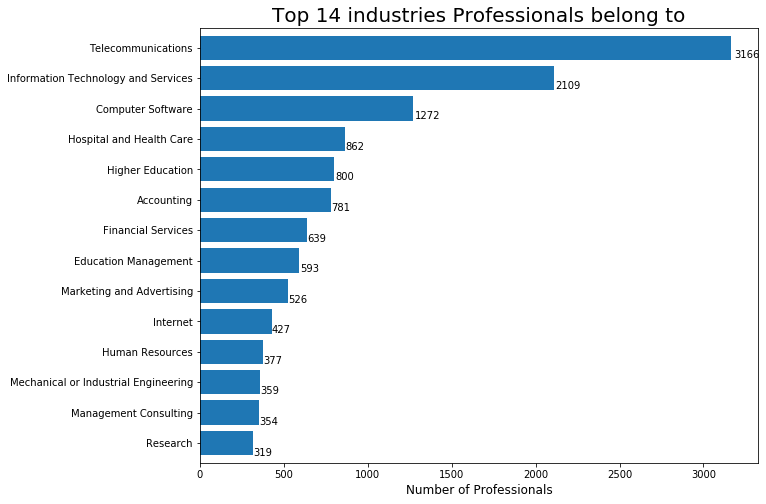

In [21]:
professionals_industries = professionals.professionals_industry.value_counts().sort_values(ascending=True).tail(14)
ax = professionals_industries.plot(kind='barh',figsize=(10, 8),width=0.8) 
ax.set_title("Top 14 industries Professionals belong to", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

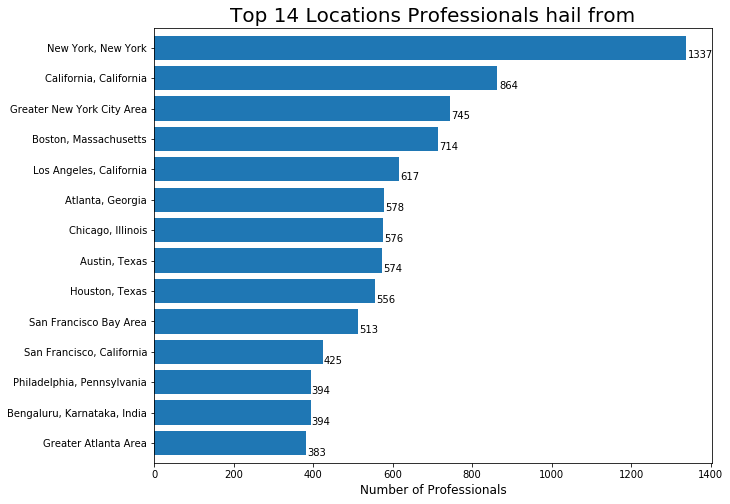

In [22]:
professionals_locations = professionals.professionals_location.value_counts().sort_values(ascending=True).tail(14)
ax = professionals_locations.plot(kind='barh',figsize=(10, 8),width=0.8) 
ax.set_title("Top 14 Locations Professionals hail from", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

In [23]:
import datetime
df_profs = professionals.copy()
df_profs['YearJoined']=df_profs['professionals_date_joined'].dt.year
prof_yrjoined = df_profs.groupby('YearJoined').count()
prof_yrjoined = prof_yrjoined.drop ('professionals_id',axis=1)
prof_yrjoined = prof_yrjoined.drop ('professionals_location',axis=1)
prof_yrjoined = prof_yrjoined.drop ('professionals_industry',axis=1)
prof_yrjoined = prof_yrjoined.drop ('professionals_headline',axis=1)
prof_yrjoined = prof_yrjoined.rename(columns={'professionals_date_joined':'Count'})

prof_yrjoined.head()

,Count
YearJoined,
2011,57
2012,222
2013,429
2014,987
2015,1540


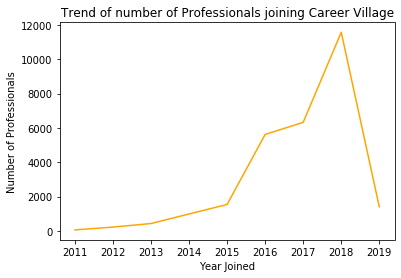

In [24]:
plt.plot(prof_yrjoined, color='orange')
plt.xlabel('Year Joined')
plt.ylabel('Number of Professionals')
plt.title('Trend of number of Professionals joining Career Village')
plt.show()

### Summary of Professionals
#### with details like total number of email received, questions received answers given

In [27]:
questions_received = matches.merge(right=emails, how = 'left',
                                            left_on ='matches_email_id',
                                            right_on ='emails_id')
emailsreceived = professionals.merge(right=emails, how = 'left',
                                            left_on ='professionals_id',
                                            right_on ='emails_recipient_id')
answersgiven_cnt = answers.groupby(['answers_author_id']).count()
answersgiven_cnt = answersgiven_cnt.sort_values('answers_author_id')
answersgiven_cnt = answersgiven_cnt.reset_index()
answersgiven_cnt = answersgiven_cnt.rename(columns={'answers_id': 'answers_given'})
answersgiven_cnt = answersgiven_cnt.drop(['answers_date_added','answers_body','answers_question_id'], axis=1)

questions_received_cnt = questions_received.groupby(['emails_recipient_id']).count()
questions_received_cnt = questions_received_cnt.sort_values('emails_recipient_id')
questions_received_cnt = questions_received_cnt.reset_index()
questions_received_cnt = questions_received_cnt.rename(columns={'emails_id': 'questions_received'})
questions_received_cnt = questions_received_cnt.drop(['matches_email_id','matches_question_id','emails_date_sent','emails_frequency_level'], axis=1)

emailsreceived_cnt = emailsreceived.groupby(['emails_recipient_id','professionals_date_joined','professionals_location','professionals_industry']).count()
emailsreceived_cnt = emailsreceived_cnt.sort_values('emails_recipient_id')
emailsreceived_cnt = emailsreceived_cnt.reset_index()
emailsreceived_cnt = emailsreceived_cnt.rename(columns={'emails_id': 'emails_received'})
emailsreceived_cnt = emailsreceived_cnt.drop(['professionals_id','professionals_headline','emails_date_sent','emails_frequency_level'], axis=1)

prof_e_q_det = emailsreceived_cnt.merge(questions_received_cnt, how='inner')
prof_e_q_det = prof_e_q_det.merge(answersgiven_cnt, how='left',
                                 left_on ='emails_recipient_id',
                                 right_on ='answers_author_id')
prof_e_q_det = prof_e_q_det.drop(['answers_author_id'],axis=1)
prof_e_q_det = prof_e_q_det.fillna(0)
prof_e_q_det.head()

,emails_recipient_id,professionals_date_joined,professionals_location,professionals_industry,emails_received,questions_received,answers_given
0,00009a0f9bda43eba47104e9ac62aff5,2016-03-14 17:00:48+00:00,"New York, New York",Media,14,15,3.0
1,000196ef8db54b9a86ae70ad31745d04,2018-05-15 20:27:44+00:00,Greater Chicago Area,Accounting,42,109,0.0
2,000d4635e5da41e3bfd83677ee11dda4,2016-04-27 16:38:34+00:00,"Nashville, Tennessee",Information Technology and Services,945,2335,3.0
3,000e2b5714444d79a672bf927905135c,2017-10-11 02:04:27+00:00,Greater Detroit Area,Financial Services,3,6,0.0
4,0018873fbf7742aba1bf13fff12cbfa4,2018-05-24 20:34:27+00:00,"Portland, Oregon Area",Financial Services,10,25,0.0


# Students

In [25]:
print("Count of Students and columns - " + str(students.shape))
print("Unique Locations - " + str(students.students_location.nunique()))
print("Missing values in Location - " + str(students.students_location.isna().sum()))

Count of Students and columns - (30971, 3)
Unique Locations - 5480
Missing values in Location - 2033


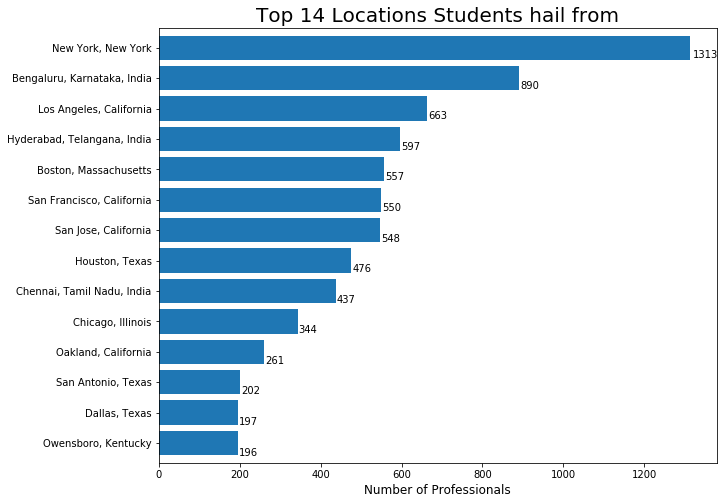

In [26]:
students_locations = students.students_location.value_counts().sort_values(ascending=True).tail(14)
ax = students_locations.plot(kind='barh',figsize=(10, 8),width=0.8) 
ax.set_title("Top 14 Locations Students hail from", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))


In [27]:
import datetime
df_students = students.copy()
df_students['YearJoined']=df_students['students_date_joined'].dt.year
student_yrjoined = df_students.groupby('YearJoined').count()
student_yrjoined = student_yrjoined.drop ('students_id',axis=1)
student_yrjoined = student_yrjoined.drop ('students_location',axis=1)
student_yrjoined = student_yrjoined.rename(columns={'students_date_joined':'Count'})

student_yrjoined.head()

,Count
YearJoined,
2011,2
2012,453
2013,570
2014,1722
2015,2576


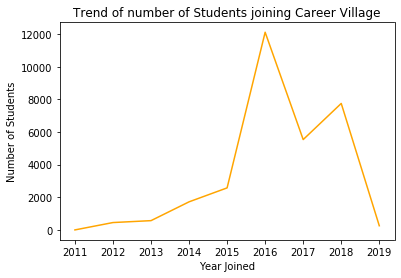

In [28]:
plt.plot(student_yrjoined, color='orange')
plt.xlabel('Year Joined')
plt.ylabel('Number of Students')
plt.title('Trend of number of Students joining Career Village')
plt.show()

# Tags

In [15]:
print(tags.columns)

Index(['tags_tag_id', 'tags_tag_name'], dtype='object')


In [16]:
atag = pd.merge(answers, tag_questions, how = 'inner',
                                            left_on ='answers_question_id',
                                            right_on ='tag_questions_question_id')
print('Number of total tags are ' + str(len(atag)) + ' for ' + str(len(atag.answers_id.unique())) + ' questions')


Number of total tags are 176350 for 49437 questions


In [17]:
qtag = pd.merge(pd.merge(questions, tag_questions, how='inner',
                                           left_on = 'questions_id',
                                           right_on = 'tag_questions_question_id'),
                                                tags, how='inner',
                                                left_on='tag_questions_tag_id',
                                                right_on='tags_tag_id')
ptag = pd.merge(pd.merge(professionals, tag_users, how='inner',
                                           left_on = 'professionals_id',
                                           right_on = 'tag_users_user_id'),
                                                tags, how='inner',
                                                left_on='tag_users_tag_id',
                                                right_on='tags_tag_id')
qtag=qtag.groupby('tags_tag_name').count()
ptag=ptag.groupby('tags_tag_name').count()
qtag = qtag.rename(columns={'tag_questions_question_id':'TagsInQuestions'})
ptag = ptag.rename(columns={'tag_users_user_id':'TagsFollowedByProfessionals'})
tagcounts=qtag[['TagsInQuestions']].join(ptag[['TagsFollowedByProfessionals']], how='inner')
tagcounts=tagcounts[(tagcounts['TagsInQuestions'] > 100) & (tagcounts['TagsFollowedByProfessionals'] > 100)]
tagcounts=tagcounts.sort_values(by=['TagsInQuestions'], ascending=False)
taglist=tagcounts.index[:].tolist()


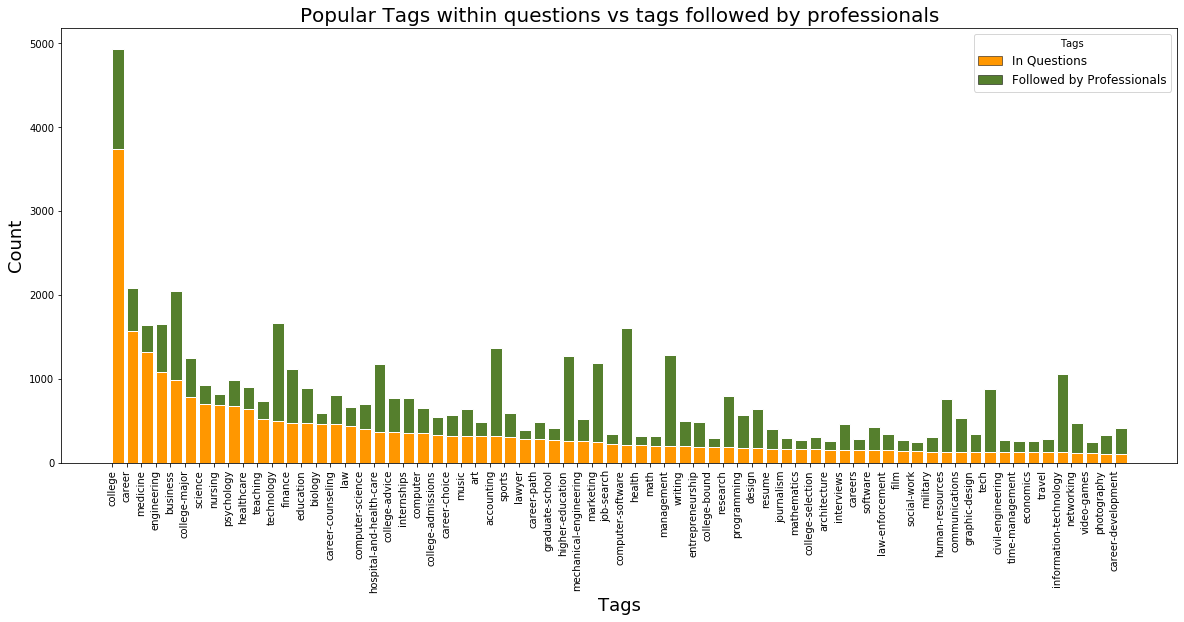

In [18]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', size='10')
 
# Values of each group
bars1 = tagcounts['TagsInQuestions'].tolist()
bars2 = tagcounts['TagsFollowedByProfessionals'].tolist()
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = list(range(0,len(tagcounts)))
 
# Names of group and bar width
names= taglist
barWidth = 0.8
 
plt.figure(figsize=(20, 8))  # width:20, height:8
# Create brown bars
plt.bar(r, bars1, color='#ff9700', edgecolor='white', align='edge', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white',align='edge', width=barWidth)

b1 = mpatches.Patch(facecolor='#ff9700', label='In Questions', linewidth = 0.5, edgecolor = 'black')
b2 = mpatches.Patch(facecolor='#557f2d', label = 'Followed by Professionals', linewidth = 0.5, edgecolor = 'black')
plt.legend(handles=[b1, b2], title="Tags", loc=1, fontsize='12', fancybox=True)

# Custom X axis
plt.xticks(r, names)
plt.xticks(rotation=90)
plt.xlabel("Tags", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Popular Tags within questions vs tags followed by professionals",fontsize=20)

# Show graphic
plt.show()


In [28]:
answers_tags = answers.merge(right=tag_questions, how = 'inner',
                                            left_on ='answers_question_id',
                                            right_on ='tag_questions_question_id')
answers_tags = answers_tags.merge(right=tag_users, how = 'left',
                                            left_on =['tag_questions_tag_id','answers_author_id'],
                                            right_on =['tag_users_tag_id','tag_users_user_id'])

question_tags_followed = answers_tags.fillna(-1).groupby(['tag_questions_tag_id','tag_users_tag_id']).count()
question_tags_followed = question_tags_followed.sort_values('tag_questions_tag_id')
question_tags_followed = question_tags_followed.reset_index()
question_tags_followed = question_tags_followed.rename(columns={'answers_id': 'Count'})
question_tags_followed = question_tags_followed.merge(right=tags, how = 'inner',
                                            left_on ='tag_questions_tag_id',
                                            right_on ='tags_tag_id')
question_tags_followed = question_tags_followed.drop(['answers_author_id','answers_question_id','answers_date_added','answers_body','tag_questions_question_id','tag_users_user_id','tags_tag_id'], axis=1)
question_tags_followed.head(10)

,tag_questions_tag_id,tag_users_tag_id,Count,tags_tag_name
0,27,-1.0,161,military
1,27,27.0,142,military
2,29,-1.0,949,teaching
3,29,29.0,253,teaching
4,36,-1.0,376,health
5,36,36.0,35,health
6,42,-1.0,181,veterinary
7,42,42.0,149,veterinary
8,46,-1.0,486,lawyer
9,46,46.0,234,lawyer


In [35]:
followed = question_tags_followed[question_tags_followed['tag_users_tag_id']>0]
notfollowed = question_tags_followed[question_tags_followed['tag_users_tag_id']<0]
foldf = pd.merge(followed, notfollowed, how='outer',
                                left_on='tag_questions_tag_id',
                                right_on='tag_questions_tag_id')
foldf['diff']=(foldf['Count_x']-foldf['Count_y']).abs()
foldf = foldf.sort_values('diff', ascending=False)
foldf=foldf.head()

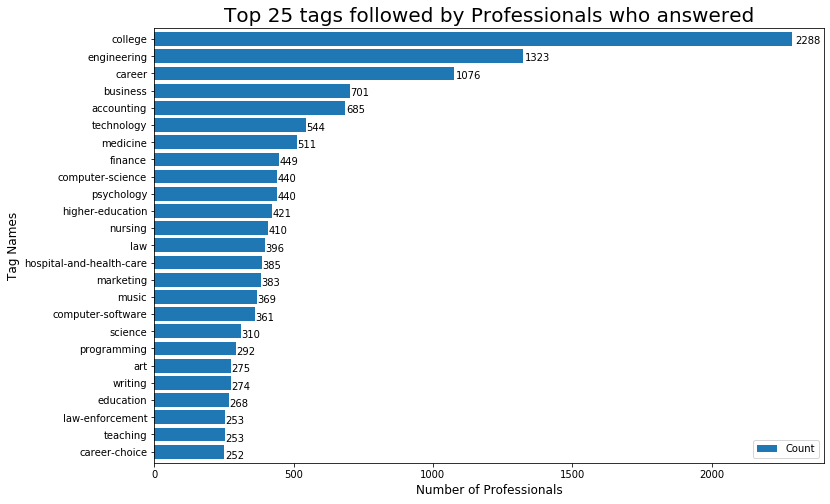

In [32]:
followedtags=followed.copy()
followedtags = followedtags[['tags_tag_name','Count']].sort_values('Count',ascending=True).tail(25)
followedtags.set_index('tags_tag_name', inplace=True)

ax = followedtags.plot(kind='barh',figsize=(12, 8),width=0.8) 
ax.set_title("Top 25 tags followed by Professionals who answered", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
ax.set_ylabel('Tag Names', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

In [33]:
notfollowedtags=answers_tags.copy()
notfollowedtags=notfollowedtags[notfollowedtags.tag_users_user_id.isnull()==True]
notfollowedtags = notfollowedtags.groupby(['answers_author_id','answers_id']).count()
notfollowedtags = notfollowedtags.reset_index()

notfollowedtags = notfollowedtags.groupby(['answers_author_id']).count()
notfollowedtags = notfollowedtags.rename(columns={'answers_id': 'Count'})
notfollowedtags = notfollowedtags.merge(right=professionals, how = 'inner',
                                            left_on ='answers_author_id',
                                            right_on ='professionals_id')
notfollowedtags = notfollowedtags.drop(['tag_questions_tag_id','tag_users_tag_id','answers_question_id','answers_date_added','answers_body','tag_questions_question_id','tag_users_user_id','professionals_headline'], axis=1)

notfollowedtags.head()

,Count,professionals_id,professionals_location,professionals_industry,professionals_date_joined
0,3,00009a0f9bda43eba47104e9ac62aff5,"New York, New York",Media,2016-03-14 17:00:48+00:00
1,3,000d4635e5da41e3bfd83677ee11dda4,"Nashville, Tennessee",Information Technology and Services,2016-04-27 16:38:34+00:00
2,24,00271cc10e0245fba4a35e76e669c281,"San Antonio, Texas Area",Animation/ cartooning,2018-09-12 16:42:17+00:00
3,4,003cc21be89d4e42bc4424131a378e86,"Boston, Massachusetts",Insurance,2017-10-19 18:08:19+00:00
4,4,0046ab8089c04b3a8df3f8c28621a818,"Woodbridge Township, New Jersey",Insurance,2017-05-10 15:39:00+00:00


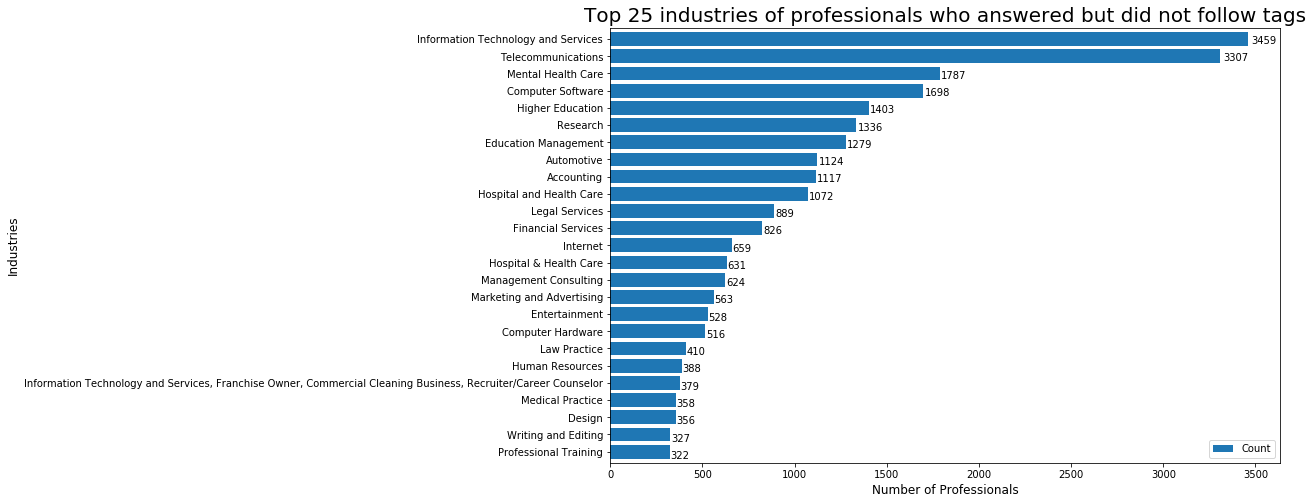

In [34]:
notfollowedtags_industry=notfollowedtags.copy()
notfollowedtags_industry = notfollowedtags_industry.groupby(['professionals_industry'])['Count'].sum()
notfollowedtags_industry = notfollowedtags_industry.reset_index()
notfollowedtags_industry = notfollowedtags_industry.sort_values('Count',ascending=True).tail(25)
notfollowedtags_industry.set_index('professionals_industry', inplace=True)
ax = notfollowedtags_industry.plot(kind='barh',figsize=(12, 8),width=0.8) 
ax.set_title("Top 25 industries of professionals who answered but did not follow tags", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
ax.set_ylabel('Industries', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

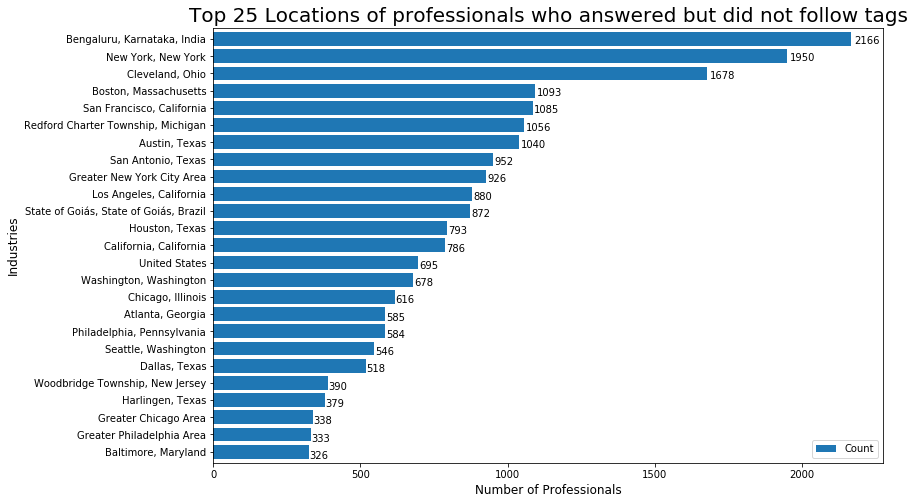

In [36]:
notfollowedtags_location=notfollowedtags.copy()
notfollowedtags_location = notfollowedtags_location.groupby(['professionals_location'])['Count'].sum()
notfollowedtags_location = notfollowedtags_location.reset_index()
notfollowedtags_location = notfollowedtags_location.sort_values('Count',ascending=True).tail(25)
notfollowedtags_location.set_index('professionals_location', inplace=True)
ax = notfollowedtags_location.plot(kind='barh',figsize=(12, 8),width=0.8) 
ax.set_title("Top 25 Locations of professionals who answered but did not follow tags", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
ax.set_ylabel('Industries', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

TypeError: only size-1 arrays can be converted to Python scalars

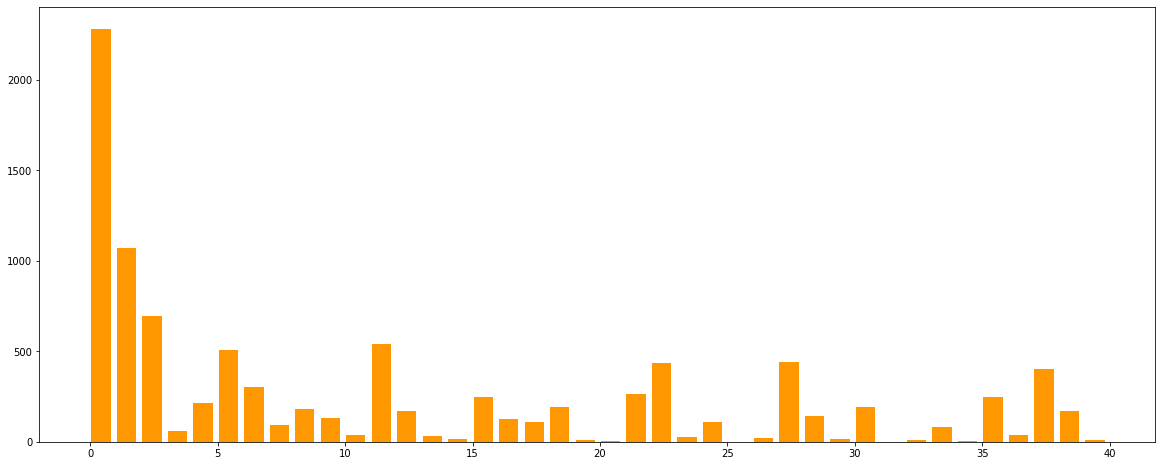

In [31]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', size='10')
 
# Values of each group
bars1 = foldf['Count_x']
bars2 = foldf['Count_y']


# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = list(range(0,40))
 
# Names of group and bar width
names= foldf['tags_tag_name_x']
barWidth = 0.8
 
plt.figure(figsize=(20, 8))  # width:20, height:8
# Create brown bars
plt.bar(r, bars1, color='#ff9700', edgecolor='white', align='edge', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white',align='edge', width=barWidth)

b1 = mpatches.Patch(facecolor='#ff9700', label='Followed', linewidth = 0.5, edgecolor = 'black')
b2 = mpatches.Patch(facecolor='#557f2d', label = 'Not Followed', linewidth = 0.5, edgecolor = 'black')
plt.legend(handles=[b1, b2], title="Question Tags", loc=1, fontsize='12', fancybox=True)

# Custom X axis
plt.xticks(r, names)
plt.xticks(rotation=90)
plt.xlabel("Tags", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Questions answered by professionals who followed tags or not",fontsize=20)

# Show graphic
plt.show()


# Groups

In [24]:
print(groups.columns)
print('-'*70)
print(group_memberships.columns)

Index(['groups_id', 'groups_group_type'], dtype='object')
----------------------------------------------------------------------
Index(['group_memberships_group_id', 'group_memberships_user_id'], dtype='object')


In [25]:
group_det = group_memberships.join(groups, how = 'inner').groupby('groups_group_type').count()
group_det = group_det.drop ('group_memberships_user_id',axis=1)
group_det = group_det.drop ('groups_id',axis=1)
group_det = group_det.rename(columns={'group_memberships_group_id':'Count'})
group_det

,Count
groups_group_type,
cause,2
club,1
competition,1
interest group,1
mentorship program,3
professional network,8
youth program,33


In [26]:
prof_grp = professionals.merge(group_memberships, how = 'left',
                                            left_on ='professionals_id',
                                            right_on ='group_memberships_user_id')

prof_grp = pd.merge(groups, prof_grp, how='inner',
                left_on ='groups_id',
                right_on ='group_memberships_group_id')

prof_grp=prof_grp.groupby('groups_group_type').count()

prof_grp = prof_grp.rename(columns={'group_memberships_group_id':'Professionals_Count'})
prof_grp[['Professionals_Count']]

St_grp = students.merge(group_memberships, how = 'left',
                                            left_on ='students_id',
                                            right_on ='group_memberships_user_id')

St_grp = pd.merge(groups, St_grp, how='inner',
                left_on ='groups_id',
                right_on ='group_memberships_group_id')

St_grp=St_grp.groupby('groups_group_type').count()

St_grp = St_grp.rename(columns={'group_memberships_group_id':'Students_Count'})
St_grp[['Students_Count']]
allingrp=prof_grp[['Professionals_Count']].join(St_grp[['Students_Count']], how='inner')
allingrp

,Professionals_Count,Students_Count
groups_group_type,,
cause,161,71
club,12,10
competition,3,1
interest group,9,4
mentorship program,17,5
professional network,64,28
youth program,461,192
